### Test of the network's k-WTA feature

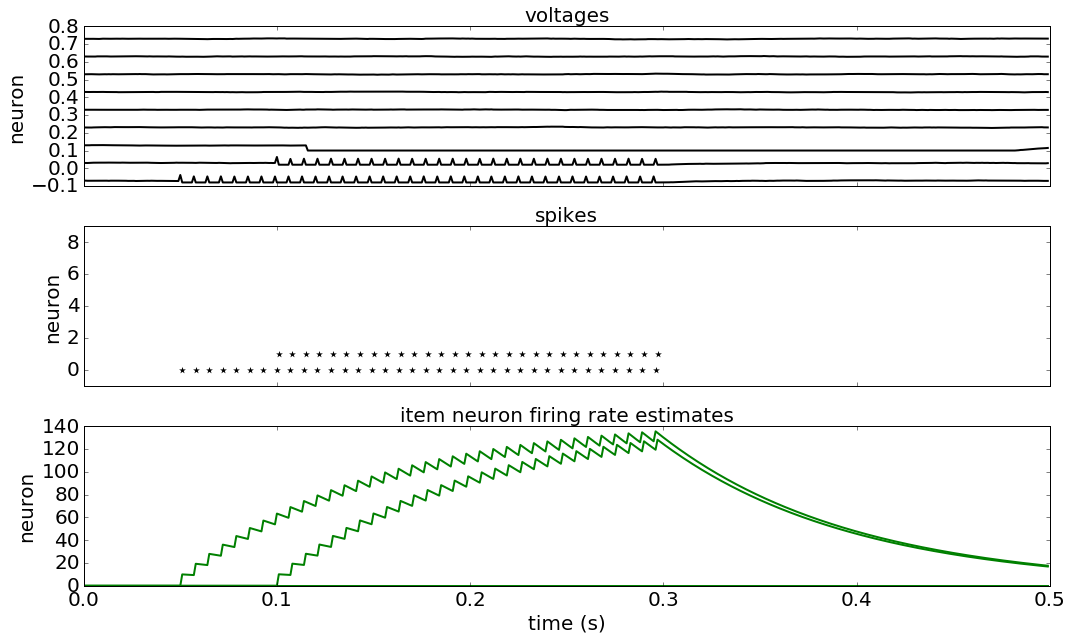

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

W_PA = np.zeros((3, 3))

W_AP = W_PA.T

W_AM = np.zeros((3, 3))
W_MA = np.zeros((3, 3))
W_MM = np.zeros((3, 3))

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:300, 0] = 1
drives['item'][100:300, 1] = 1
drives['item'][150:300, 2] = 1

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Basic associative encoding without memory

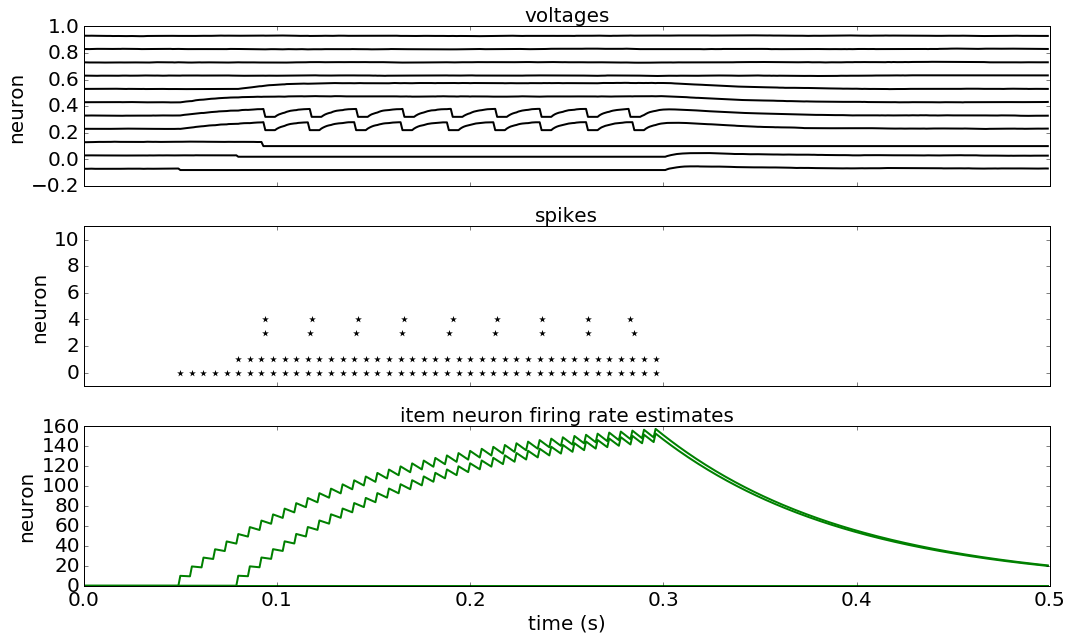

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 5. * temp

W_AP = 1. * temp.T

W_AM = np.zeros((4, 4))
W_MA = np.zeros((4, 4))
W_MM = np.zeros((4, 4))

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:300, 0] = 2
drives['item'][80:300, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Basic associative encoding with memory

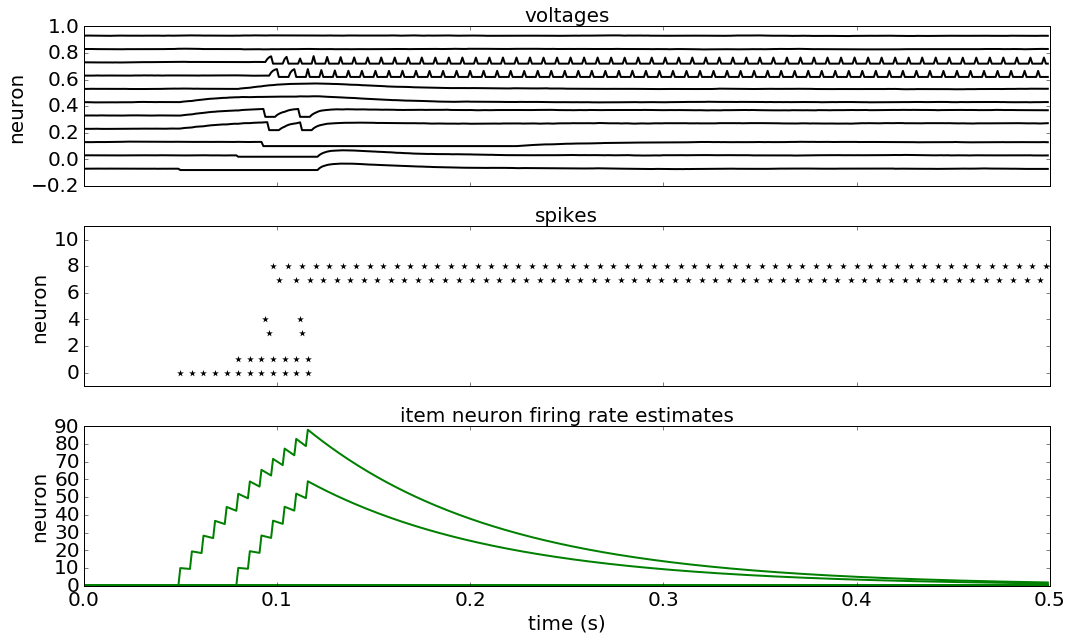

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 5. * temp

W_AP = 1. * temp.T

W_AM = np.eye(4)
W_MA = 10 * np.eye(4)
W_MM = 15 * np.eye(4)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 0] = 2
drives['item'][80:120, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

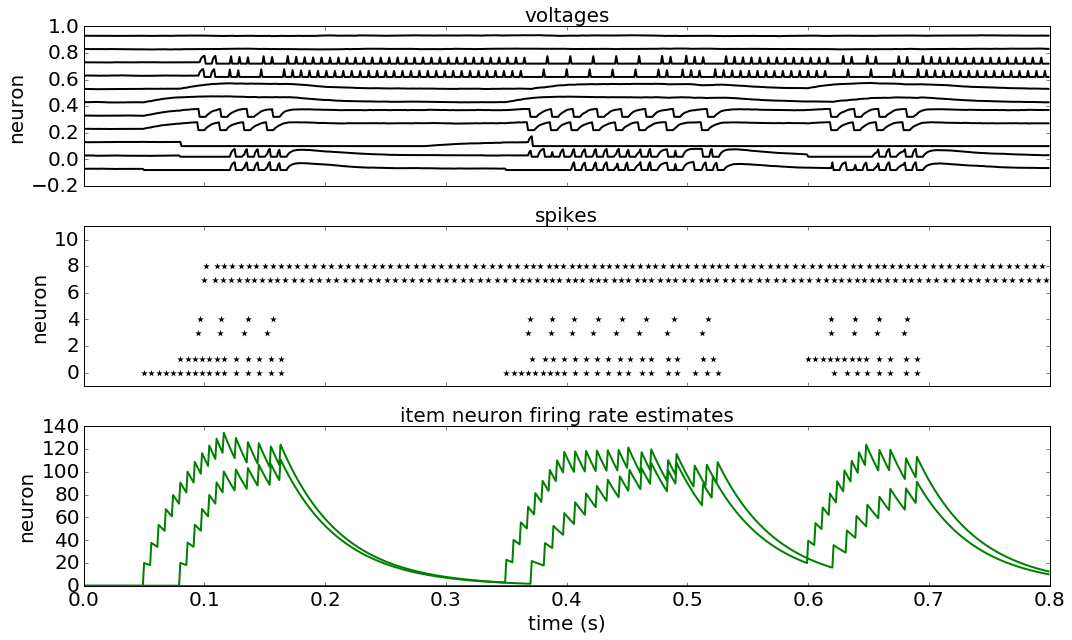

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .05
K_WTA = 2
WTA_TH = 10.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 10. * temp

W_AP = 1. * temp.T

W_AM = np.eye(4)
W_MA = 10 * np.eye(4)
W_MM = 15 * np.eye(4)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 800

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 0] = 2
drives['item'][80:120, 1] = 2

drives['item'][350:400, 0] = 2

drives['item'][600:650, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Test with a lot of neurons

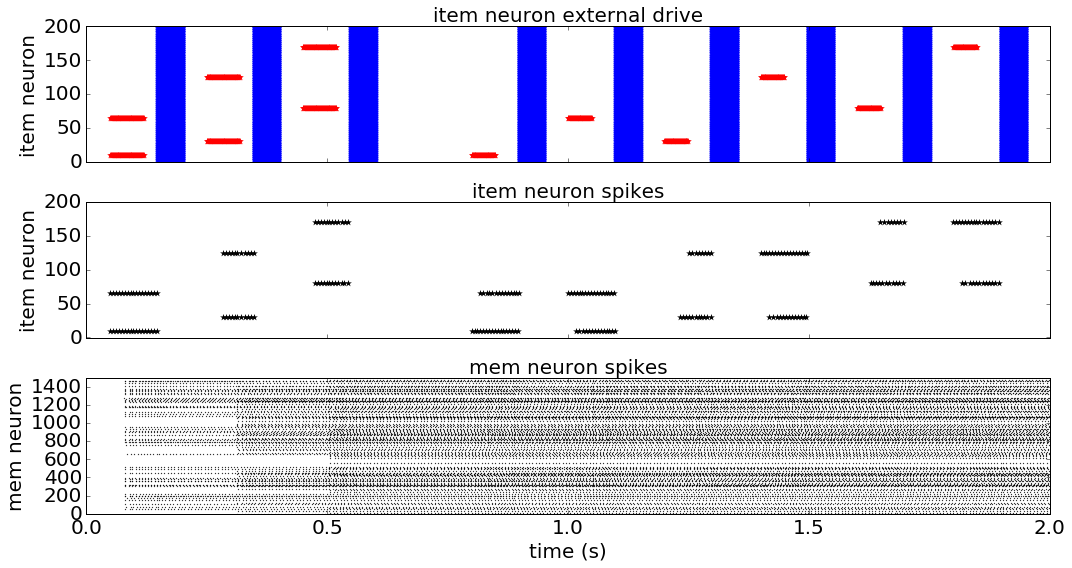

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

np.random.seed(0)

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .05
K_WTA = 2
WTA_TH = 10.
WTA_INH = -.5
NOISE = 0.01

N_ITEMS = 200
N_ASSOCS = 1500
P_CXN = 0.15

cxn_ap = (np.random.rand(N_ITEMS, N_ASSOCS) < P_CXN).astype(float)

W_PA = 1. * cxn_ap

W_AP = 1. * cxn_ap.T

W_AM = np.eye(N_ASSOCS)
W_MA = 10 * np.eye(N_ASSOCS)
W_MM = 15 * np.eye(N_ASSOCS)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 2000

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 10] = 2
drives['item'][50:120, 65] = 2
drives['item'][250:320, 30] = 2
drives['item'][250:320, 125] = 2
drives['item'][450:520, 80] = 2
drives['item'][450:520, 170] = 2
drives['item'][800:850, 10] = 2
drives['item'][1000:1050, 65] = 2
drives['item'][1200:1250, 30] = 2
drives['item'][1400:1450, 125] = 2
drives['item'][1600:1650, 80] = 2
drives['item'][1800:1850, 170] = 2

drives_item_no_inh = drives['item'].copy()

drives_item_inh = np.zeros((n_steps, n_items))

drives_item_inh[150:200, :] = -10
drives_item_inh[350:400, :] = -10
drives_item_inh[550:600, :] = -10
drives_item_inh[900:950, :] = -10
drives_item_inh[1100:1150, :] = -10
drives_item_inh[1300:1350, :] = -10
drives_item_inh[1500:1550, :] = -10
drives_item_inh[1700:1750, :] = -10
drives_item_inh[1900:1950, :] = -10

drives['item'] += drives_item_inh

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 8), sharex=True, tight_layout=True)

drive_times, drive_idxs = drives_item_no_inh.nonzero()
inh_times, inh_idxs = drives_item_inh.nonzero()

axs[0].scatter(drive_times * dt, drive_idxs, marker='*', s=50, c='r', lw=0)
axs[0].scatter(inh_times * dt, inh_idxs, marker='*', s=50, c='b', lw=0)

axs[0].set_ylim(-1, n_items)

axs[0].set_ylabel('item neuron')

axs[0].set_title('item neuron external drive')

spike_times, spike_idxs = results['spikes'][:, :n_items].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_xlim(0, n_steps * dt)
axs[1].set_ylim(-1, n_items)

axs[1].set_ylabel('item neuron')
axs[1].set_title('item neuron spikes')

spike_times, spike_idxs = results['spikes'][:, n_items+n_assocs:n_items+n_assocs+n_mems].nonzero()

axs[2].scatter(spike_times * dt, spike_idxs, marker='*', s=4, c='k', lw=0)

axs[2].set_ylim(-1, n_mems)

axs[2].set_xlabel('time (s)')
axs[2].set_ylabel('mem neuron')

axs[2].set_title('mem neuron spikes')

for ax in axs:
    
    set_fontsize(ax, 20)

In [10]:
x = range(10)

zip(x[::2], x[1::2])

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

In [9]:
x[1::2]

[1, 3, 5, 7, 9]

In [11]:
range(0, 10, 2)

[0, 2, 4, 6, 8]

In [12]:
range(1, 10, 2)

[1, 3, 5, 7, 9]

In [7]:
import numpy as np

for _ in range(1000):
    
    v = np.random.rand(1000, 1000) > 0.2

In [6]:
v = np.random.rand(1000000, 1000) > 0.2

In [10]:
.999 ** 1000

0.36769542477096373

([array([ 0.0076,  0.0363,  0.2409,  0.4183,  0.7711,  0.8851,  0.9823,
          0.9948,  0.9997,  1.    ]),
  array([ 0.0081,  0.0357,  0.2437,  0.4214,  0.7709,  0.8871,  0.9817,
          0.994 ,  0.9993,  1.    ])],
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 2 Lists of Patches objects>)

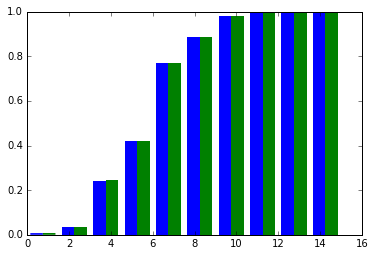

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

stats.binom.cdf(4, 9, .1)

sx = 23
rx = 22
sz = 20
q = 0.3

xs = []

for _ in range(10000):
    
    x = np.random.rand(sx) < q
    
    if np.sum(x) <= rx:
        
        xs.append(x)

nxs = []
nzs = []

for x in xs:
    
    nxs.append(np.sum(x))
    nzs.append(np.sum(x[-sz:]))
    
nzs_clean = np.random.binomial(sz, q, 10000)
    
plt.hist([nzs, nzs_clean], normed=True, cumulative=True, lw=0)

In [25]:
import numpy as np

np.random.binomial(6, .3, (100,))

array([2, 2, 0, 4, 4, 1, 3, 3, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 4, 2, 0, 0, 1,
       1, 1, 0, 4, 2, 1, 4, 2, 0, 3, 2, 4, 3, 0, 4, 2, 2, 1, 2, 2, 3, 1, 3,
       1, 1, 5, 3, 2, 4, 3, 2, 1, 3, 1, 4, 3, 2, 1, 1, 3, 4, 2, 1, 5, 0, 1,
       3, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 3, 2, 1, 3, 1, 3, 3, 2, 3, 1, 2, 1,
       1, 1, 1, 2, 0, 3, 2, 1])

In [34]:
range(4).pop(2)

2

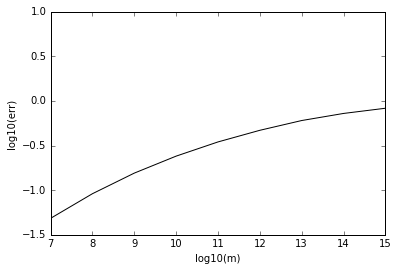

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import recall_error_upper_bound_vs_item_number

ms = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15])
n = 1000
q = 0.2
l = 3
n_samples_mc = 500

errs = recall_error_upper_bound_vs_item_number(ms=ms, n=n, q=q, l=l, n_samples_mc=n_samples_mc)

fig, ax = plt.subplots(1, 1)

ax.plot(np.log10(ms), np.log10(errs), color='k')
    
ax.axhline(0.999, color='red')
ax.set_xlabel('log10(m)')
ax.set_ylabel('log10(err)')

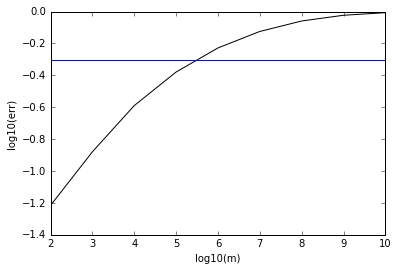

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import recall_error_upper_bound_vs_item_number

ms = np.array([1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
n = 500
q = 0.2
l = 3
n_samples_mc = 500

errs = recall_error_upper_bound_vs_item_number(ms=ms, n=n, q=q, l=l, n_samples_mc=n_samples_mc)

fig, ax = plt.subplots(1, 1)

ax.plot(np.log10(ms), np.log10(errs), color='k')

ax.axhline(np.log10(0.5))
ax.set_xlabel('log10(m)')
ax.set_ylabel('log10(err)')

In [16]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_low_recall_error

n = 500
q = 0.2
l = 3
n_samples_mc = 500
err_max = 0.5

m_best = max_items_with_low_recall_error(
    n=n, q=q, l=l, err_max=err_max, n_samples_mc=n_samples_mc)

print(np.log10(m_best))

5.35687051955


In [2]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 1500
q = 0.2
l = 4
p_min = 0.999
n_samples_mc = 50000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

24186.4807676


In [3]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 1800
q = 0.2
l = 4
p_min = 0.999
n_samples_mc = 50000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

2479114.34394


In [4]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 2100
q = 0.2
l = 4
p_min = 0.999
n_samples_mc = 50000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

381972918.996


In [63]:
%matplotlib inline
import pdb
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 5000
q = 0.3
l = 4
p_min = 0.9999
n_samples_mc = 5000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

2.25191241126e+11


In [50]:
pdb.pm()

> /Users/rkp/anaconda/lib/python2.7/site-packages/scipy/optimize/zeros.py(442)brentq()
-> r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
(Pdb) u
> /Users/rkp/Dropbox/Repositories/associative_properties/network_analysis.py(84)max_items_with_min_recall_probability()
-> m_best = optimize.brentq(function_to_solve, m_test / 2, m_test, xtol=0.5)
(Pdb) m_test
8
(Pdb) q


In [45]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 6000
q = 0.2
l = 4
p_min = 0.999
n_samples_mc = 5000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

2.25292646476e+12


In [46]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

from network_analysis import max_items_with_min_recall_probability

n = 7000
q = 0.2
l = 4
p_min = 0.999
n_samples_mc = 5000

m_best = max_items_with_min_recall_probability(
    n=n, q=q, l=l, p_min=p_min, n_samples_mc=n_samples_mc)

print(m_best)

2.25292646476e+12


In [78]:
np.exp(1e2)

2.6881171418161356e+43

$$h = cdf = 1 - sf$$
$$log(h) = log(1 - sf) \approx -sf = -exp(log(sf))$$
$$log(-log(h)) = log(sf)$$

calc sf first

use approximation if sf under 1e-9 but always work with log(-log(h))

i.e.

returns log(-log(h))

if sf < 1e-9: return log(sf)

else: return log(-log(1 - sf))

$$h = \prod_i cdf_i = \prod_i (1 - sf_i)$$
$$-log(h) = -\sum_i log(cdf_i) = \sum_i - log(1 - sf_i)$$
$$= \sum_i sf_i \textrm{ if } sf_i < 10^{-9} \forall i$$

and 

$$-log(h) = \sum_i sf^*_i = exp(log(sf^*_1)) + exp(log(sf^*_2)) + ... + exp(log(sf^*_{2L}))$$
$$= exp(log(sf^*_1))[1 + exp(log(sf^*_2) - log(sf^*_1)) + ... + exp(log(sf^*_{2L}) - log(sf^*_1)]$$

get all log(1 - sf_i)s or sf_is

$$p = h^{m - 2L} = exp[(m - 2L)log(h)] = exp[(2L - m)(-log(h))] = exp[-(m - 2L)(-log(h))]$$

$$= exp(-exp[log(m - 2L) + log(-log(h))])$$

compute $d = log(m - 2L) + log(-log(h))$ first

$$err = 1 - p$$
$$log(p) = log(1 - err) \approx -err$$
$$err \approx -log(p)$$
$$= exp(log(m - 2L) + log(-log(h)))$$

valid only if $1 - p = err < 1e-9$

In [2]:
import numpy as np

log_xs = np.array([-1000,-1001,-1002])
np.log(np.sum(np.exp(log_xs)))

/Users/rkp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


-inf

$$err = 1 - exp(-exp(temp)) < 10^{-9}$$

$$1 - 10^{-9} < exp(-exp(temp))$$

$$log(1 - 10^{-9}) < -exp(temp)$$

$$exp(temp) < -log(1 - 10^{-9})$$
$$temp < log(-log(1 - 10^{-9}))$$